In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('C:/Users/Guillermo/Downloads/kmeans.csv')#cambiar al directorio local con las barras invertidas hacia la derecha
df.head()

,ï»¿X,Y,Z
0,0.014579,-0.014945,1.007415
1,0.014091,0.001891,1.008879
2,0.014823,0.000183,1.011807
3,0.014091,0.001159,1.011807
4,0.014579,-0.012749,1.001071


In [4]:
df.columns

Index(['ï»¿X', 'Y', 'Z'], dtype='object')

In [5]:
df.describe()

,ï»¿X,Y,Z
count,100.000000,100.000000,100.000000
mean,0.015401,0.000122,1.009540
std,0.001792,0.005090,0.004017
min,0.005063,-0.032025,1.001071
25%,0.014823,-0.000061,1.007415
50%,0.015311,0.000427,1.009367
75%,0.015799,0.000671,1.011319
max,0.025315,0.033154,1.032547


In [6]:
df.isnull().sum()

ï»¿X    0
Y       0
Z       0
dtype: int64

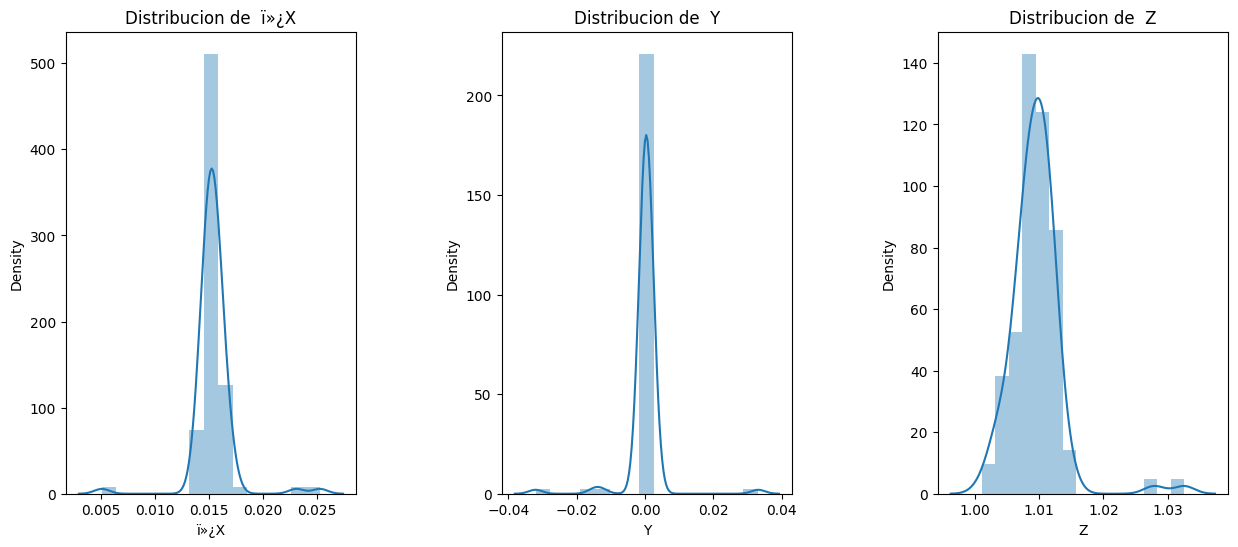

In [40]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['ï»¿X' , 'Y' , 'Z']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distribucion de  {}'.format(x))
plt.show()


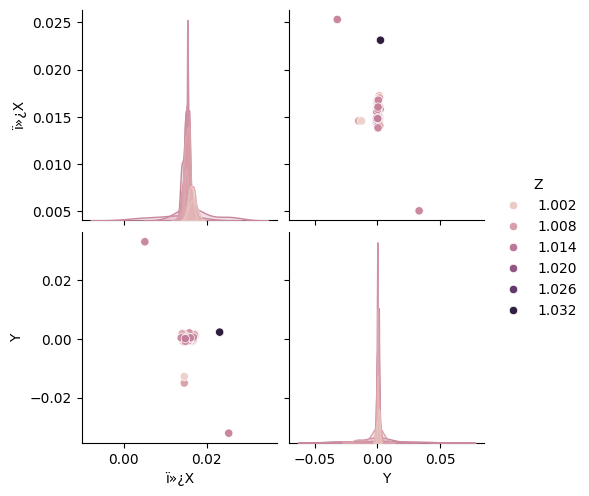

In [12]:
sns.pairplot(df, vars = ['ï»¿X', 'Y'], hue = "Z")

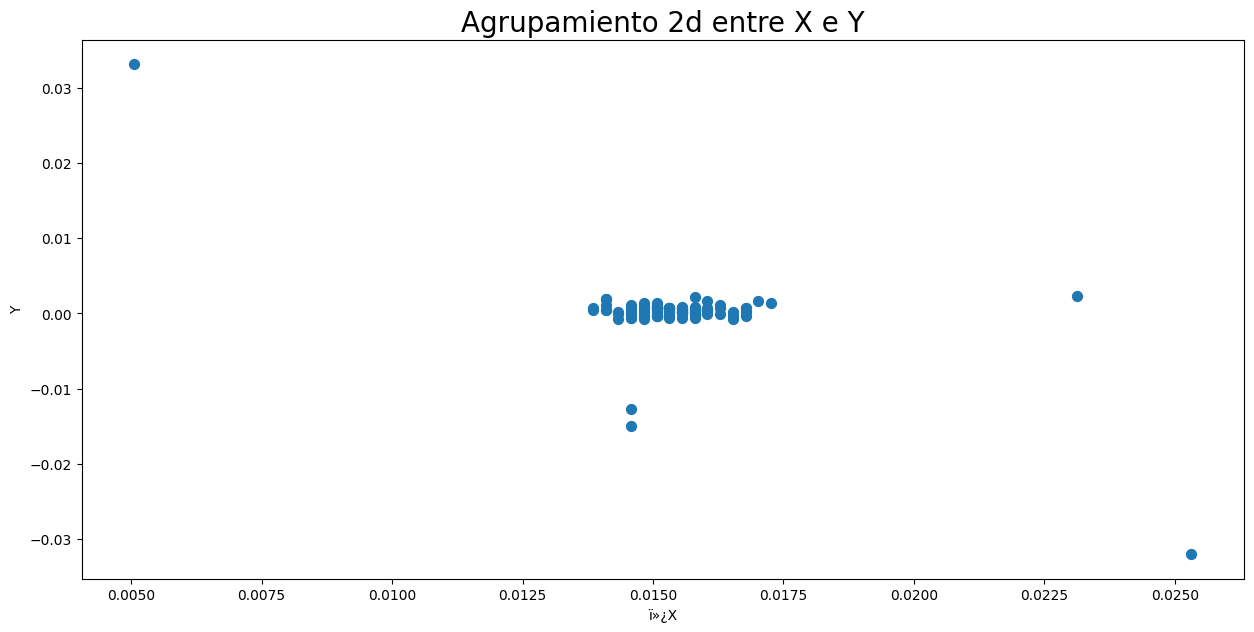

In [16]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Agrupamiento 2d entre X e Y', fontsize = 20)
plt.xlabel('ï»¿X')
plt.ylabel('Y')
plt.scatter( x = 'ï»¿X', y = 'Y', data = df, s = 50)
plt.show()

In [17]:
X1 = df[['ï»¿X' , 'Y']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

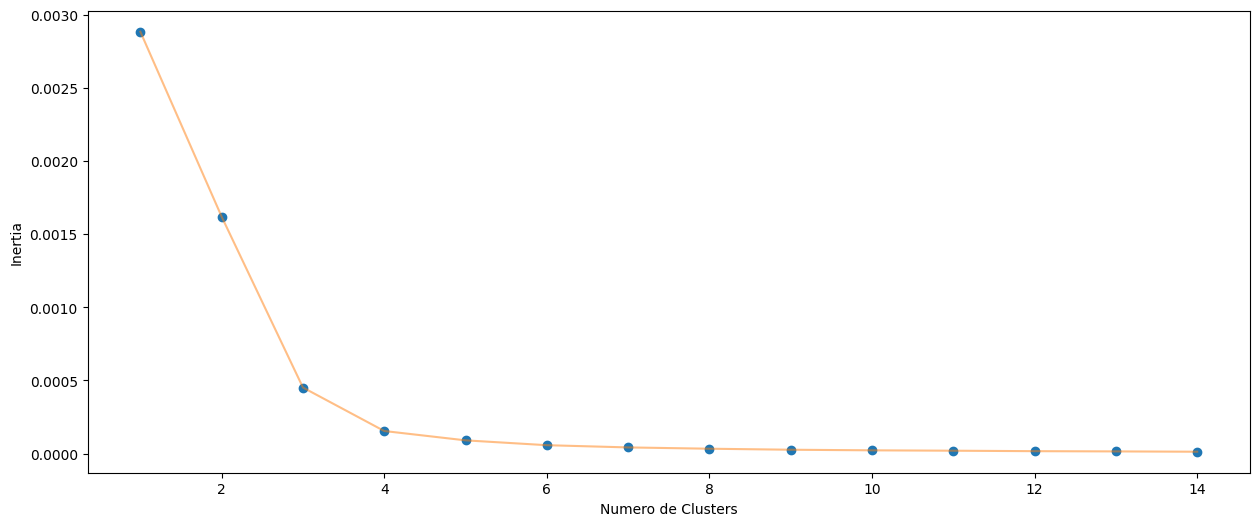

In [18]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters') , plt.ylabel('Inertia')
plt.show()

In [19]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

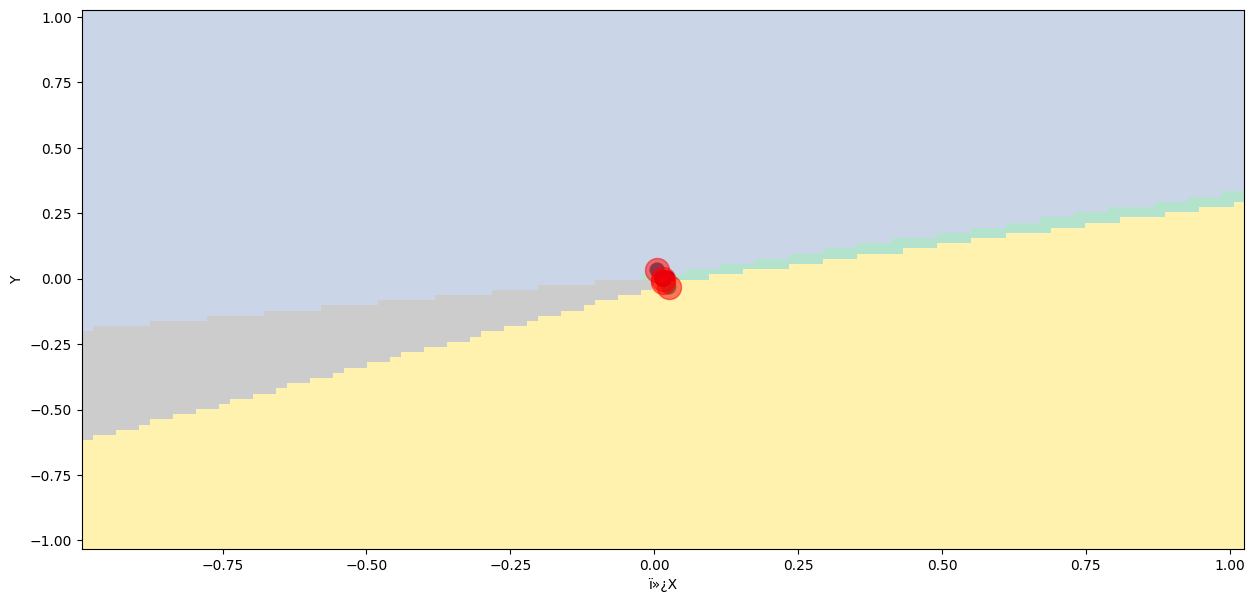

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'ï»¿X', y = 'Y', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Y') , plt.xlabel('ï»¿X')
plt.show()

In [25]:
X3 = df[['ï»¿X' , 'Z' ,'Y']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

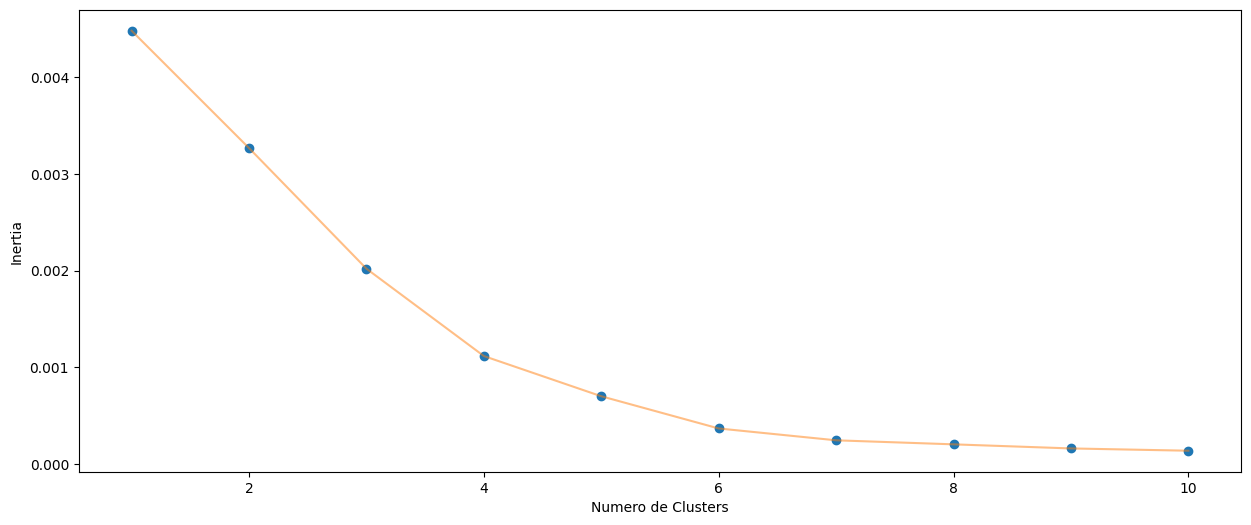

In [31]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters') , plt.ylabel('Inertia')
plt.show()

In [34]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,ï»¿X,Y,Z,cluster
0,0.014579,-0.014945,1.007415,2
1,0.014091,0.001891,1.008879,0
2,0.014823,0.000183,1.011807,0
3,0.014091,0.001159,1.011807,0
4,0.014579,-0.012749,1.001071,2


In [36]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= df['ï»¿X'],
    y= df['Y'],
    z= df['Z'],
    mode='markers',
     marker=dict(
        color = df['cluster'], 
        size= 10,
        line=dict(
            color= df['cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters con X, Z e Y',
    scene = dict(
            xaxis = dict(title  = 'ï»¿X'),
            yaxis = dict(title  = 'Y'),
            zaxis = dict(title  = 'Z')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [30]:
df.head()

,ï»¿X,Y,Z,cluster
0,0.014579,-0.014945,1.007415,2
1,0.014091,0.001891,1.008879,4
2,0.014823,0.000183,1.011807,4
3,0.014091,0.001159,1.011807,4
4,0.014579,-0.012749,1.001071,2
